In [3]:
import pandas as pd

In [6]:
# Load the dataset into a Pandas DataFrame
amazon_df = pd.read_csv('amazon.csv')
amazon_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


# Top 5 des meilleures catégories.

In [7]:
# Split the 'listed_in' column by comma and create a new DataFrame with each genre in a new row
genres_df = amazon_df['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')

# Count the number of occurrences of each genre
genre_counts = genres_df['genre'].value_counts()

# Display the top 5 genres
print(genre_counts.head(5))

genre
Drama        2216
Action       1657
Comedy       1475
 Drama       1471
 Suspense    1307
Name: count, dtype: int64


# Top 5 des réalisateurs

In [8]:
# Split the 'director' column by comma and create a new DataFrame with each director in a new row
directors_df = amazon_df['director'].str.split('\n', expand=True).stack().reset_index(level=1, drop=True).to_frame('director')

# Count the number of occurrences of each director
director_counts = directors_df['director'].value_counts()

# Display the top 5 directors
print(director_counts.head(5))

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: count, dtype: int64


#  Les dix meilleurs acteurs.

In [11]:
# Drop rows with NaN values in 'cast' column
amazon_df.dropna(subset=['cast'], inplace=True)

actors_df = pd.DataFrame(amazon_df['cast'].str.split(',').tolist(), index=amazon_df['show_id']).stack()
actors_df = actors_df.reset_index([0, 'show_id'])
actors_df.columns = ['show_id', 'actor']

# Count the number of times each actor appears
actor_counts = actors_df['actor'].value_counts()

# Display top 10 actors
print(actor_counts.head(10))

actor
Maggie Binkley        56
1                     35
Gene Autry            32
 Nassar               30
 Champion             29
Anne-Marie Newland    25
 Prakash Raj          23
Roy Rogers            23
Cassandra Peterson    22
John Wayne            21
Name: count, dtype: int64


# Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.


In [12]:
amazon_df['duration'] = amazon_df['duration'].str.extract('(\d+)')

In [70]:
amazon_df['duration']=pd.to_numeric(amazon_df['duration'])

In [13]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8435 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8435 non-null   object
 1   type          8435 non-null   object
 2   title         8435 non-null   object
 3   director      6951 non-null   object
 4   cast          8435 non-null   object
 5   country       655 non-null    object
 6   date_added    108 non-null    object
 7   release_year  8435 non-null   int64 
 8   rating        8123 non-null   object
 9   duration      8435 non-null   object
 10  listed_in     8435 non-null   object
 11  description   8435 non-null   object
dtypes: int64(1), object(11)
memory usage: 856.7+ KB


In [15]:
tv_series_df = amazon_df[amazon_df['type'] == 'TV Show']
tv_series_grouped = tv_series_df.groupby('title')['duration'].sum()

# Sort the results by the total number of seasons and select the top five
top_five_series = tv_series_grouped.sort_values(ascending=False)
top_five_series.head(5)

title
Scrubs          9 Seasons
'Allo 'Allo!    9 Seasons
Suits           9 Seasons
Teen Wolf       9 Seasons
Vikings         9 Seasons
Name: duration, dtype: object

# Contenus similaires : 

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
# Preprocess the text
tfidf = TfidfVectorizer(stop_words='english')
amazon_df['description'] = amazon_df['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(amazon_df['description'])

# Compute similarity scores
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cluster similar entries
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(similarity_matrix)

# Add the cluster labels to the dataset
clusters = km.labels_.tolist()
amazon_df['cluster'] = clusters

# Print the number of entries in each cluster
print(amazon_df['cluster'].value_counts())

# Print the top movies and TV shows in each cluster
for i in range(num_clusters):
    cluster_df = amazon_df[amazon_df['cluster'] == i]
    top_entries = cluster_df.sort_values(['release_year'], ascending=False).head(5)
    print(f"Top entries in cluster {i}:")
    for j, row in top_entries.iterrows():
        print(f"{j}: {row['title']} ({row['type']}, {row['release_year']})")
    print('\n')

cluster
2    7910
1     470
0      55
Name: count, dtype: int64
Top entries in cluster 0:
3529: 15-Minute Legs & Booty Sculpt 9.0 Workout (with weights) (Movie, 2020)
3542: 15-Minute Core Challenge 9.0 Workout (with weights) (Movie, 2020)
3939: 15-Minute HIIT 9.0 (tabata workout with weights) (Movie, 2020)
3938: 15-Minute Total Body Shred 9.0 Workout (with weights) (Movie, 2020)
3654: 15-Minute Upper Body Chisel 9.0 Workout (with weights) (Movie, 2020)


Top entries in cluster 1:
5809: Lea & Pop - Baby Shark & More Kids Songs (Movie, 2021)
6110: Steve and Maggie - Laugh and Learn (TV Show, 2021)
5400: Engada Iruthinga Ivvalavu Naala (Movie, 2021)
5703: Learn with Teeter Taught Animation (Movie, 2021)
5808: Lea & Pop - Twinkle Twinkle Little Star & More Kids Songs (Movie, 2021)


Top entries in cluster 2:
5152: Honesty Weekend (Movie, 2021)
8514: KFF's Bad Kill (Movie, 2021)
6474: The Adventures of Major Miracle (Movie, 2021)
6467: A Kind Of Wonderful Thing (Movie, 2021)
6466: Badanamu 

In [23]:
amazon_df['cluster']

0       2
1       2
2       2
3       2
4       2
       ..
9663    2
9664    2
9665    2
9666    2
9667    2
Name: cluster, Length: 8435, dtype: int64

In [24]:
# Preprocess the text
tfidf = TfidfVectorizer(stop_words='english')
amazon_df['listed_in'] = amazon_df['listed_in'].fillna('')
tfidf_matrix = tfidf.fit_transform(amazon_df['listed_in'])

# Compute similarity scores
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cluster similar entries
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(similarity_matrix)

# Add the cluster labels to the dataset
clusters = km.labels_.tolist()
amazon_df['cluster'] = clusters

# Print the number of entries in each cluster
print(amazon_df['cluster'].value_counts())

# Print the top movies and TV shows in each cluster
for i in range(num_clusters):
    cluster_df2 = amazon_df[amazon_df['cluster'] == i]
    top_entries = cluster_df2.sort_values(['release_year'], ascending=False).head(5)
    print(f"Top entries in cluster {i}:")
    for j, row in top_entries.iterrows():
        print(f"{j}: {row['title']} ({row['type']}, {row['release_year']},{row['listed_in']})")
    print('\n')

cluster
1    3136
4    1269
2    1217
3    1153
0     921
5     739
Name: count, dtype: int64
Top entries in cluster 0:
7032: Emerald Run (Movie, 2021,Action, Drama, Suspense)
4338: Calls (Movie, 2021,Suspense)
7826: Alice in Panchalinadu (Movie, 2021,Drama, Suspense)
4377: Mirugaa (Movie, 2021,Action, Drama, Suspense)
7811: Goliath (TV Show, 2021,Drama, Suspense)


Top entries in cluster 1:
9666: Maradona: Blessed Dream (TV Show, 2021,Drama, Sports)
5519: Bigfoot, UFOs and Jesus (Movie, 2021,Drama, Science Fiction, Special Interest)
5913: Soñadora: A Rising Voices Film (Movie, 2021,Drama, Science Fiction)
5920: Sergio Ramos (TV Show, 2021,Sports, Unscripted)
5941: Kaathadi (Movie, 2021,Drama, Kids, Special Interest)


Top entries in cluster 2:
5770: The Pizza Joint (Movie, 2021,Comedy)
4464: Kitty Mammas (Movie, 2021,Comedy, Drama)
1698: Meant To Be Broken (Movie, 2021,Comedy)
8491: Mike Epps: Under Rated, Never Faded & X-Rated (Movie, 2021,Comedy)
6742: IKKAT (Movie, 2021,Comedy, Dra

In [32]:
amazon_df.describe()

,release_year,cluster
count,8435.000000,8435.000000
mean,2007.454060,2.110255
std,19.645431,1.524344
min,1920.000000,0.000000
25%,2005.000000,1.000000
50%,2016.000000,2.000000
75%,2019.000000,3.000000
max,2021.000000,5.000000


# Netflix/Amazon/Disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

In [25]:
grouped = amazon_df.groupby(['release_year', 'type']).size().unstack()

In [27]:
grouped

type,Movie,TV Show
release_year,,
1920,3.0,NaN
1922,2.0,NaN
1923,1.0,NaN
1924,1.0,NaN
1925,8.0,NaN
...,...,...
2017,348.0,102.0
2018,400.0,140.0
2019,593.0,142.0


In [28]:
df_anne=grouped.tail(6)
df_anne

type,Movie,TV Show
release_year,,
2016,361.0,82.0
2017,348.0,102.0
2018,400.0,140.0
2019,593.0,142.0
2020,644.0,194.0
2021,1002.0,230.0


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

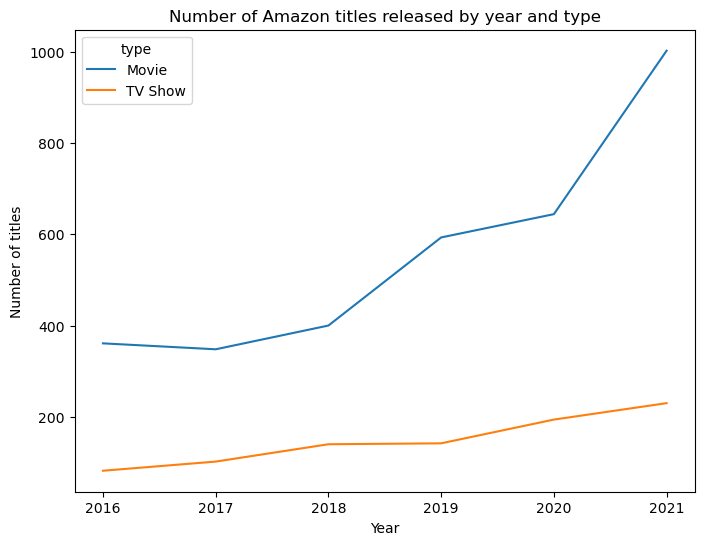

In [31]:
df_anne.plot(kind='line', figsize=(8,6))
plt.title('Number of Amazon titles released by year and type')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.show()